### Basic MLP example with deeplib

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from deeplib.engine import Tensor
from deeplib.modules import Module, Sequential
from deeplib.layers import Linear
from deeplib.activations import ReLU, Sigmoid
from deeplib.losses import MSELoss
from deeplib.optimizers import GD, SGD, Adam
from deeplib.utils import split_dataset, DataLoader, Trainer

In [3]:
seed = 1337

In [4]:
np.random.seed(seed)
random.seed(seed)

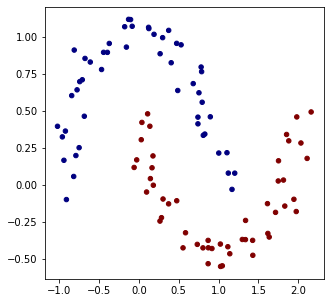

In [5]:
# make up a dataset
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [6]:
class MultiLayerPerceptron(Module):
    
    def __init__(self):
        super().__init__()
        self.linear1 = Linear(2, 16)
        self.linear2 = Linear(16, 1)
        self.relu = ReLU()
        self.sigmoid = Sigmoid()
        
        self.mlp = Sequential(
            self.linear1,
            self.relu,
            self.linear2,
            self.sigmoid
        )
        self.track_module(self.mlp)
        
    def forward(self, x:Tensor):
        out = self.mlp(x)
        
        return out

model = MultiLayerPerceptron()
print("MLP Model:", model)

MLP Model: MultiLayerPerceptron(tracked_modules=1, parameters=65, trainable=65, non_trainable=0)


In [7]:
train, test, _ = split_dataset(X, y, test_split=0.2, shuffle=True)
print("Train samples:", len(train), "| Test samples:", len(test))
train_loader = DataLoader(train[0], train[1], 4)
test_loader = DataLoader(test[0], test[1], len(test[0])) # 1 batch of all test samples
print("Train batches:", len(train_loader), "| Test batches:", len(test_loader))

Train samples: 2 | Test samples: 2
Train batches: 20 | Test batches: 1


In [8]:
loss_fn = MSELoss()
optimizer = GD(model.parameters(), lr=0.01)

trainer = Trainer(model)
history = trainer.fit(train_loader, 10, loss_fn, optimizer, show_pbar=False)

EPOCH 1/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 2/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 3/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 4/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 5/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 6/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 7/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 8/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 9/10 loss: 1.2397804141392608 accuracy: 0.275

EPOCH 10/10 loss: 1.2397804141392608 accuracy: 0.275



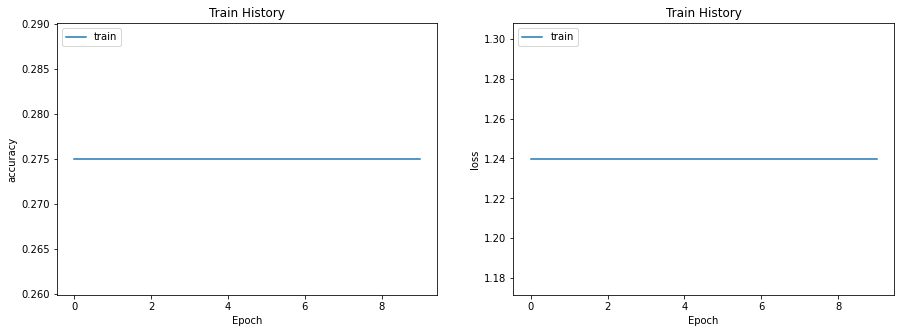

In [9]:
trainer.plot(['accuracy', 'loss'])

In [10]:
# visualize decision boundary

# h = 0.25
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Xmesh = np.c_[xx.ravel(), yy.ravel()]
# inputs = [list(map(Value, xrow)) for xrow in Xmesh]
# scores = list(map(model, inputs))
# Z = np.array([s.data > 0 for s in scores])
# Z = Z.reshape(xx.shape)

# fig = plt.figure()
# plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
